In [1]:
import string

def tokenize(sentence):
    # Split the sentence by spaces
    words = sentence.split()
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    return stripped

sentence = "This is my sentence, to parse. Get all punctuation out# of here!"
tokens = tokenize(sentence)
print(type(tokens))
print(tokens)


<class 'list'>
['This', 'is', 'my', 'sentence', 'to', 'parse', 'Get', 'all', 'punctuation', 'out', 'of', 'here']


In [2]:
import string
import nltk

def ngram(paragraph, n):
    # Split the sentence by spaces
    words = paragraph.split()
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    bi_grams = nltk.ngrams(stripped, n)
    return bi_grams

paragraph = "This is my sentence, to parse. Get all punctuation out# of here!"
bi_grams = ngram(paragraph, 3)
for gram in bi_grams:
    print(gram)

('This', 'is', 'my')
('is', 'my', 'sentence')
('my', 'sentence', 'to')
('sentence', 'to', 'parse')
('to', 'parse', 'Get')
('parse', 'Get', 'all')
('Get', 'all', 'punctuation')
('all', 'punctuation', 'out')
('punctuation', 'out', 'of')
('out', 'of', 'here')


In [4]:
import string
import nltk
from numpy import array
from numpy import argmax

from tensorflow.keras.utils import to_categorical

def onehtencode(data):
    data = array(data)
    print("Received array")
    print(data)
    # one hot encode
    encoded = to_categorical(data)
    return encoded

data = [1, 3, 2, 0, 3, 2, 2, 1, 0, 1]
encodedval = onehtencode(data)
print("One Hot Encoded values")
print(encodedval)

Received array
[1 3 2 0 3 2 2 1 0 1]
One Hot Encoded values
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)
Epoch 1/10
7/7 [==============================] - 1s 65ms/step - loss: 0.6960 - acc: 0.4800 - val_loss: 0.6946 - val_acc: 0.5208
Epoch 2/10
7/7 [==============================] - 0s 59ms/step - loss: 0.4928 - acc: 0.9550 - val_loss: 0.7044 - val_acc: 0.5125
Epoch 3/10
7/7 [==============================] - 0s 54ms/step - loss: 0.3040 - acc: 0.9800 - val_loss: 0.7350 - val_acc: 0.5120
Epoch 4/10
7/7 [==============================] - 0s 60ms/step - loss: 0.1604 - acc: 0.9900 - val_loss: 0.7180 - val_acc: 0.5291
Epoch 5/10
7/7 [==============================] - 0s 74ms/step - loss: 0.0889 - acc: 1.0000 - val_loss: 0.7410 - val_acc: 0.5234
Epoch 6/10
7/7 [==============================] - 0s 77ms/step - loss: 0.0559 - acc: 1.0000 - val_loss: 0.7516 - val_acc: 0.5330
Epoch 7/10
7/7 [==============================] - 0s 79ms/step - loss: 0.0305 - acc: 1.0000 - val_loss: 0.7648 - val_acc: 0.5270
Epo

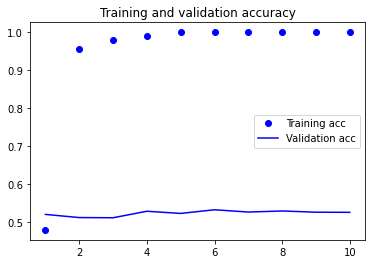

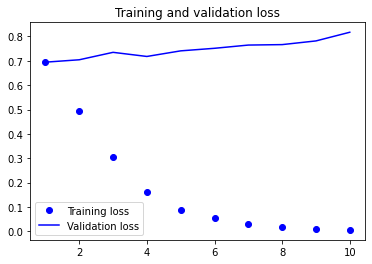

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os
from contextlib import redirect_stdout
import time
start_time = time.time()


imdb_dir = Path('C:/Users/KDossehAdjanon/Documents/dsc650-master/data/external/imdb/aclImdb/')
test_dir = os.path.join(imdb_dir, 'test')
train_dir = os.path.join(imdb_dir, 'train')

training_samples = 200
maxlen = 100
max_words = 1000
embedding_dim = 100

training_samples = 200
validation_samples = 10000

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Place plot here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

labels=[]
texts=[]

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


sequence = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)



In [11]:
eval = model.evaluate(x_test, y_test)
print("")
print(eval)

print("Complete: --- %s seconds has passed ---" % (time.time() - start_time))

782/782 [==============================] - 1s 1ms/step - loss: 0.8055 - acc: 0.5372

[0.8055416941642761, 0.5371599793434143]
Complete: --- 37.36147475242615 seconds has passed ---


Loading data... 
Found 88582 unique tokens.
Shape of data tensor: (25000, 500)
Shape of label tensor: (25000,)
input_train shape: (200, 500)
input_test shape: (10000, 500)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 200 samples, validate on 10000 samples
Epoch 1/10
192/200 [===========================>..] - ETA: 0s - loss: 0.6934 - acc: 0.4792

C:\Users\KDossehAdjanon\Anaconda3\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


200/200 [==============================] - 6s 32ms/sample - loss: 0.6936 - acc: 0.4700 - val_loss: 0.6928 - val_acc: 0.5138
Epoch 2/10
200/200 [==============================] - 6s 31ms/sample - loss: 0.6893 - acc: 0.6200 - val_loss: 0.6920 - val_acc: 0.5274
Epoch 3/10
200/200 [==============================] - 9s 43ms/sample - loss: 0.6818 - acc: 0.6800 - val_loss: 0.6897 - val_acc: 0.5738
Epoch 4/10
200/200 [==============================] - 10s 48ms/sample - loss: 0.6522 - acc: 0.8450 - val_loss: 0.6794 - val_acc: 0.6094
Epoch 5/10
200/200 [==============================] - 9s 47ms/sample - loss: 0.5912 - acc: 0.8600 - val_loss: 0.6439 - val_acc: 0.6478
Epoch 6/10
200/200 [==============================] - 9s 46ms/sample - loss: 0.5049 - acc: 0.8700 - val_loss: 0.6267 - val_acc: 0.6602
Epoch 7/10
200/200 [==============================] - 9s 47ms/sample - loss: 0.4620 - acc: 0.8900 - val_loss: 0.6958 - val_acc: 0.6020
Epoch 8/10
200/200 [==============================] - 9s 46ms/sam

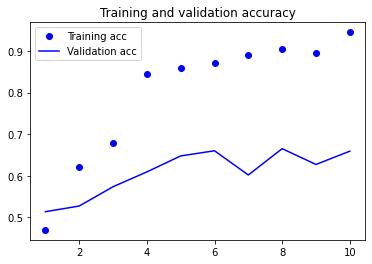

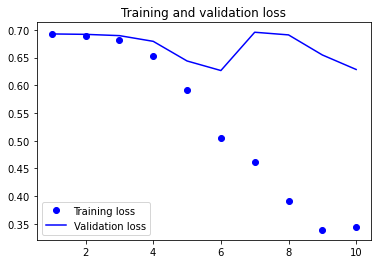


[0.6285735706329346, 0.6592]
Complete: --- 95.40647602081299 seconds has passed ---


In [13]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os
from contextlib import redirect_stdout
import time
start_time = time.time()
from keras.layers import LSTM
# Needed the following as caused CUDA DNN errors
physical_devices = tf.config.list_physical_devices('GPU')

from keras.datasets import imdb
from keras.preprocessing import sequence


max_features = 10000
maxlen = 500
batch_size = 32
max_words = 1000
training_samples = 200
validation_samples = 10000

print('Loading data... ')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


#x_train
input_train = data[:training_samples]
#y_train
y_train = labels[:training_samples]

#x_val
input_test = data[training_samples: training_samples + validation_samples]
#y_val
y_test = labels[training_samples: training_samples + validation_samples]

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)


model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history=model.fit(input_train, y_train, epochs=10, batch_size=32, validation_data=(input_test, y_test))

# Place plot here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

eval = model.evaluate(input_test, y_test)
print("")
print(eval)


print("Complete: --- %s seconds has passed ---" % (time.time() - start_time))

Loading data ...
17473536/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32) 

C:\Users\KDossehAdjanon\Anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.7500 - acc: 0.5189 - val_loss: 0.6833 - val_acc: 0.5900
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.6630 - acc: 0.6771 - val_loss: 0.6584 - val_acc: 0.6824
Epoch 3/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.6101 - acc: 0.7806 - val_loss: 0.5896 - val_acc: 0.7604
Epoch 4/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.5006 - acc: 0.8253 - val_loss: 0.4626 - val_acc: 0.8046
Epoch 5/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.3844 - acc: 0.8589 - val_loss: 0.4128 - val_acc: 0.8430
Epoch 6/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.3260 - acc: 0.8834 - val_loss: 0.4007 - val_acc: 0.8550
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.2929 - acc: 0.8985 - val_loss: 0.4120 - val_acc: 0.8624
Epoch 8/10
20000/20000 [===

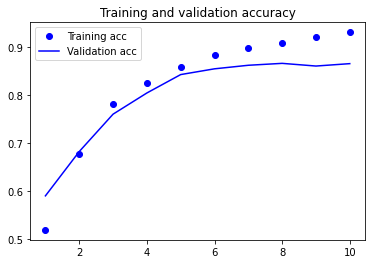

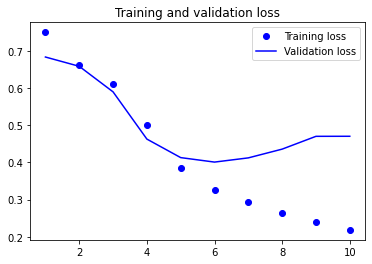


[0.49300247427463534, 0.86128]
Complete: --- 265.8159990310669 seconds has passed ---


In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop
from keras.datasets import imdb
from keras.preprocessing import sequence
from contextlib import redirect_stdout
from pathlib import Path
import time
start_time = time.time()


physical_devices = tf.config.list_physical_devices('GPU')


max_features = 10000
max_len = 500

print('Loading data ...')

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Place plot here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

eval = model.evaluate(x_test, y_test)
print("")
print(eval)

print("Complete: --- %s seconds has passed ---" % (time.time() - start_time))
